# Linear Regression 

In [174]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [217]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

sns.set_style('darkgrid')

## Normal Equation 

In [208]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

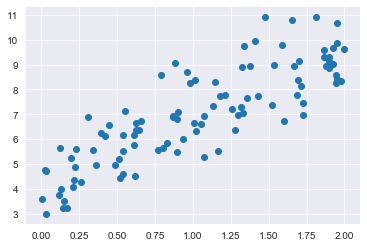

In [209]:
plt.scatter(X, y)
plt.show()

In [211]:
# Calculating theta
X_b = np.c_[np.ones((100, 1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [212]:
theta

array([[4.24838187],
       [2.68203277]])

In [213]:
# Making prediction 
X_pred = np.array([[0], [2]])
X_new = np.c_[np.ones((2, 1)), X_pred]
y_preds = X_new.dot(theta)
y_preds

array([[4.24838187],
       [9.61244742]])

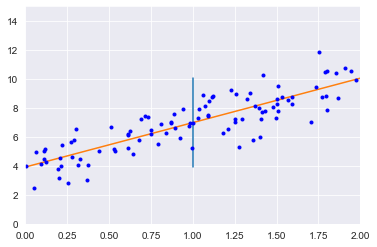

In [181]:
plt.plot(X_new, y_preds, )
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [182]:
# USing sklearn module

lin_reg = LinearRegression().fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.91772886]), array([[3.06359699]]))

## Gradient Descent

### Implementing Batch Gradient descent 

**This is what a batch gradient descent does**

set a value for the learning rate(eta)
set theta to be a randomly generated number

X = input feature(s)
y = true value
m = number of data instances

for each step in the total number of iterations:
    get the gradient by computing 2/m * X.transpose * (X.tranpose(theta) - y)
    get the new value of theta by computing; thetat - (gradient * eta)


run 0: gradient => [[-12.50856152 -14.4160201 ]]
run 100: gradient => [[-7.04446854 -7.72604567]]
run 200: gradient => [[-4.04793218 -4.07064568]]
run 300: gradient => [[-2.40185953 -2.07558796]]
run 400: gradient => [[-1.49497034 -0.98889864]]
run 500: gradient => [[-0.99276525 -0.39910339]]
run 600: gradient => [[-0.71219954 -0.08104892]]
run 700: gradient => [[-0.55310471  0.08846335]]
run 800: gradient => [[-0.4606623   0.17684256]]
run 900: gradient => [[-0.40486962  0.22097008]]
[[3.20947774]
 [3.51345331]]


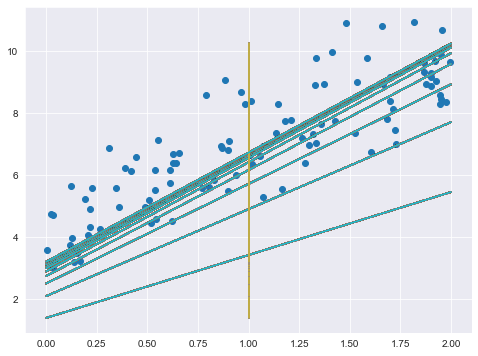

In [214]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.rand(2,1)
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
for runs in range(n_iterations):
    if runs % 100 == 0:
        gradient = 2/m *X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - (eta * gradient)
        print(f'run {runs}: gradient => {gradient.reshape(1, -1)}')
    
    y_new = X_new.dot(theta)
    plt.plot(X_new, y_new)
print(f'{theta}')

### Implementing Stochastic Gradient Descent

**This is what a stocahstic gradient descent does**

set the learning schedule parameter values (t0, t1)

set theta to be a randomly generated number

X = input feature(s)

y = true value

m = number of feature(s)

index_val = random sample of the data instance


for each step in the total number of iterations:

    for each instance in the total data instances:
        index_val = get a random sample of the data instance
        X_new = X[index_val : index_val + 1]
        y_new = y[index_value : index_val + 1]
        get the gradient by computing 2 * X_new.transpose * (X_new.tranpose(theta) - y_new)
        eta = learning_schedule(t0 / (t + t1)); where t = epoch * m + data_instance
        get the new value of theta by computing; theta - (gradient * eta)


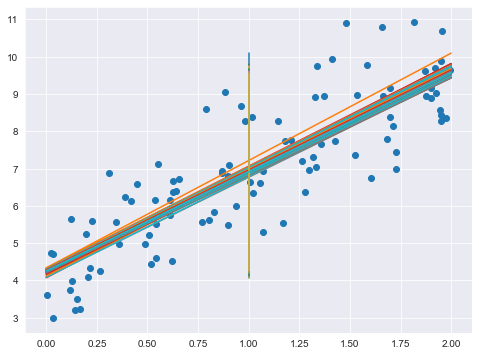

In [215]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
theta = np.random.randn(2,1)

def learning_schedule(t):
    return t0 / (t + t1)
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
for epoch in range(n_epochs):
    for instance in range(m):
        sample_index = np.random.randint(m)
        X_sample = X_b[sample_index:sample_index+1]
        y_sample = y[sample_index:sample_index+1]
        gradient = 2 * X_sample.T.dot(X_sample.dot(theta) - y_sample)
        eta = learning_schedule(epoch * m+instance)
        theta = theta - eta*gradient
    y_pred = X_new.dot(theta)
    plt.plot(X_new, y_pred);

In [216]:
theta

array([[4.25055069],
       [2.66057824]])

In [232]:
sdg_reg = SGDRegressor(eta0=0.1, max_iter=100, penalty=None, tol=1e-3).fit(X, y.ravel())
sdg_reg.intercept_, sdg_reg.coef_

(array([4.2778449]), array([2.71915684]))

### Implementing Mini_batch Gradient descent

**This is what a mini-batch gradient descent does**

set theta to be a randomly generated number

set the learning rate (eta)

X = input feature(s)

y = true value

m = number of feature(s)

index_val = random sample of the data instance

for each step in the range(total number of iterations):

    index_val = get a random sample of the data instance
    X_new = X[index_val]
    y_new = y[index_val]
    get the gradient by computing 2/m * X_new.transpose * (X_new.tranpose(theta) - y_new)
    get the new value of theta by computing; theta - (gradient * eta)

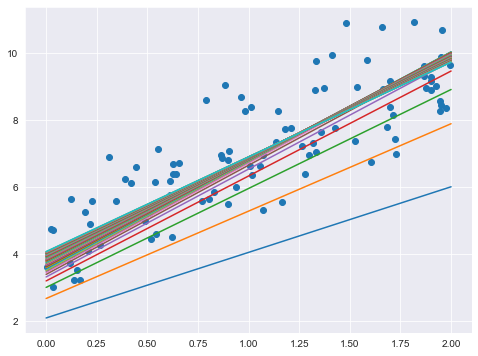

In [276]:
eta = 0.1
theta = np.random.randn(2, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
for epoch in range(n_epochs):
    rand_samples = np.random.permutation(m)
    X_samp = X_b[rand_samples]
    y_samp = y[rand_samples]
    gradient = 2/m*X_samp.T.dot(X_samp.dot(theta) - y_samp)
    theta = theta - (eta * gradient)
    
    y_new = X_new.dot(theta)
    plt.plot(X_pred, y_new)

In [267]:
theta

array([[4.05333236],
       [2.8405816 ]])